In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score  

In [4]:
df=pd.read_csv("payment_fraud.xls")
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Assuming 'label' is the column to predict
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1), df['label'], 
    test_size=0.33, random_state=17
)

In [7]:
# Train the Logistic Regression model
clf = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print(confusion_matrix(y_test, y_pred))  # Print confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))  # Print a

[[12753     0]
 [    0   190]]
Accuracy: 1.0


Confusion Matrix:
 [[12753     0]
 [    0   190]]
Accuracy: 1.0


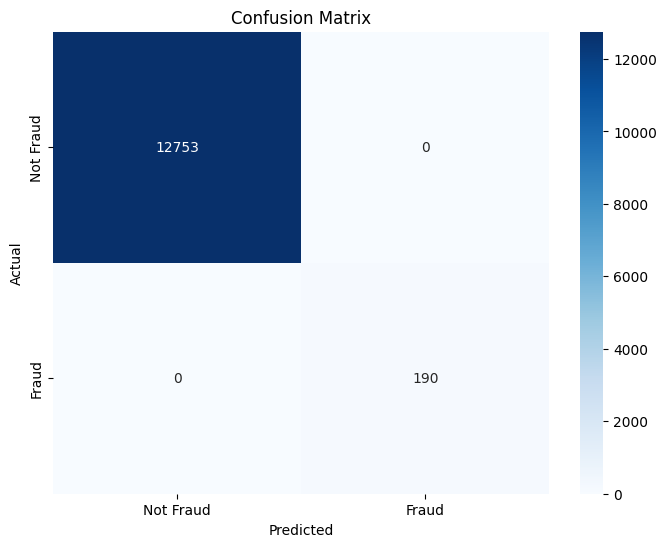

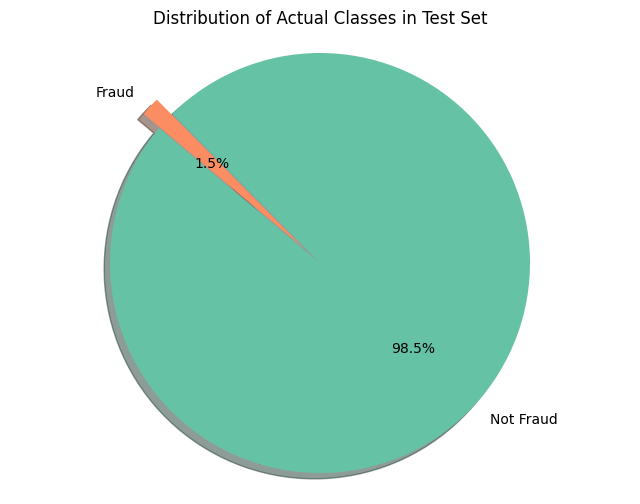

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score  

# Load the dataset
df = pd.read_csv("payment_fraud.xls")
df.head()

# Preprocess the dataset
df = pd.get_dummies(df, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1), df['label'], 
    test_size=0.33, random_state=17
)

# Create and train the model
clf = LogisticRegression(max_iter=1000) 
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Create a pie chart for the distribution of actual classes
plt.figure(figsize=(8, 6))
labels = ['Not Fraud', 'Fraud']
sizes = [np.sum(y_test == 0), np.sum(y_test == 1)]  # Count of each class in the test set
colors = ['#66c2a5', '#fc8d62']  # Colors for the pie chart
explode = (0.1, 0)  # Only "explode" the 1st slice (Not Fraud)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Actual Classes in Test Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()
